In [72]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [193]:
class Line:
    def __init__(self, m = 0, b = 0):
        self.m = m
        self.b = b
        self.f = lambda x: (m*x)+b

In [194]:
l1 = Line(-1, 5)
l2 = Line(-1, 10)
l3 = Line(-1, 15)

In [117]:
rng = np.random.default_rng()

In [254]:
def get_y_adds(size = 100):
    return(((rng.integers(low = 1, high = 20, size = size))-10)/20)

In [267]:
g_size = 100

In [268]:
X1 = rng.integers(low = 10, high = 41, size = g_size)/10
Y1 = l1.f(X1) + get_y_adds()
Z1 = list(zip(X1, Y1))

In [269]:
X2 = rng.integers(low = 10, high = 91, size = 200)/10
Y2 = l2.f(X2) + get_y_adds(200)
Z2 = list(zip(X2, Y2))

In [270]:
X3 = rng.integers(low = 60, high = 91, size = g_size)/10
Y3 = l3.f(X3) + get_y_adds()
Z3 = list(zip(X3, Y3))

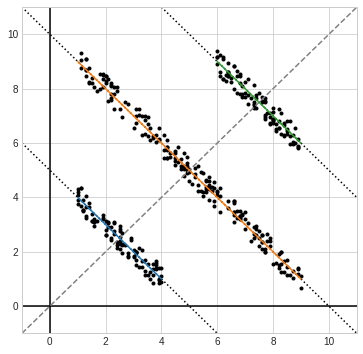

In [271]:
plt.figure(figsize = [6, 6])
plt.axis([-1, 11, -1, 11])

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')

plt.axline([0, l1.f(0)], slope = l1.m, color = 'black', linestyle = ':')
plt.axline([0, l2.f(0)], slope = l2.m, color = 'black', linestyle = ':')
plt.axline([0, l3.f(0)], slope = l3.m, color = 'black', linestyle = ':')

plt.axline([0,0], slope = 1, color = 'grey', linestyle = '--')

plt.plot([1, l1.f(1)], [4, l1.f(4)])
plt.plot([1, l2.f(1)], [9, l2.f(9)])
plt.plot([6, l3.f(6)], [9, l3.f(9)])

plt.scatter(X1, Y1, color = 'black', marker = '.')
plt.scatter(X2, Y2, color = 'black', marker = '.')
plt.scatter(X3, Y3, color = 'black', marker = '.')


plt.show()